In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.7288765   0.53005965 -0.07181377  0.70596416  0.82894072]
Accuracy: 0.54 (+/- 0.16)
Training MSE: 2156561.602
Test MSE: 13592.082


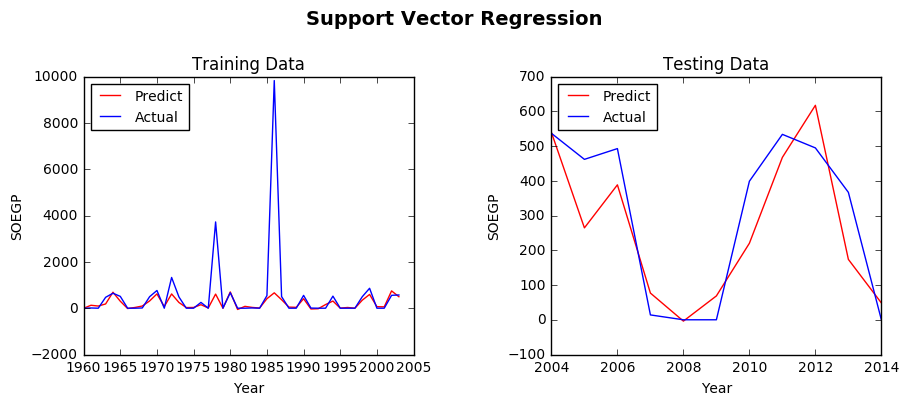

In [13]:
# Read data
data = pd.read_csv("../../Clean-Energy-Outlook/Data/data of states/CA.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['SOEGP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for solar in CA with cross-validation
clf = SVR(kernel='sigmoid', C=99.0, epsilon=0.1)
model = clf.fit(X_train, y_train)
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

train_error = mean_squared_error(y_train, clf.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, clf.predict(X_test))
print('Test MSE: %.3f' % test_error)

# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Support Vector Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, clf.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('SOEGP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, clf.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('SOEGP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [11]:
# predict Solar for future
year3 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
pred = pd.DataFrame(clf.predict(future_x))
pred.columns = ['SOEGP']
future = pd.concat([year3, pred], axis=1)
print(future)

     Year       SOEGP
0  2015.0  661.422555
1  2016.0  735.698803
2  2017.0  744.717835
3  2018.0  754.396026
4  2019.0  762.831155
5  2020.0  771.696285


In [14]:
statelist=["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
result = year3

for i in range(49):
    data = pd.read_csv('../../Clean-Energy-Outlook/Data/data of states/%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    year2 = data[['Year']][44:55]

    # Data Preprocessing
    data['GDP_scaled']=preprocessing.scale(data['GDP'])
    data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
    data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
    data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
    data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
    data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
    data['PCP_scaled']=preprocessing.scale(data['PCP'])
    data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
    data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
    data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

    # Split data for train and test
    all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
    all_y = data[['SOEGP']][:55]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

    # SVR for solar in CA with cross-validation
    clf = SVR(kernel='rbf', C=70.0, epsilon=0.3)
    model = clf.fit(X_train, y_train)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))
    
    future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
    pred = pd.DataFrame(clf.predict(future_x))
    pred.columns = [statelist[i]]
    result = pd.concat([result, pred], axis=1)

print(result)

# output to csv
result.to_csv('Solar_Pred_SVR.csv', encoding='utf-8', index=False)

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array 

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[-0.82276597  0.07545434 -0.2105185   0.          0.91138527]
Accuracy: -0.01 (+/- 0.28)
[ 0.64533168  0.29399184 -0.14609227  0.49894773  0.60878018]
Accuracy: 0.38 (+/- 0.15)
[ 0.47116385  0.37966901  0.23180872  0.          0.79847258]
Accuracy: 0.38 (+/- 0.13)
[ 0.     0.    -0.125  0.     0.   ]
Accuracy: -0.03 (+/- 0.03)
[  0.          -0.43752947  -0.01895018   0.         -14.00865907]
Accuracy: -2.89 (+/- 2.78)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[-35.66856414   0.26907563   0.23472479   0.           0.63391769]
Accuracy: -6.91 (+/- 7.19)
[ 0.         -1.34794622 -0.12854037  0.          0.        ]
Accuracy: -0.30 (+/- 0.26)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.          0.54707938  0.49311914  0.         -1.81431416]
Accuracy: -0.15 (+/- 0.43)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.          0.         -0.20909972  0.          0.        ]
Accuracy: -0.04 (+/- 0.04)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[  0.           0.12234695  -0.16941111   0.         -15.12864167]
Accuracy: -3.04 (+/- 3.02)
[  0.00000000e+00   7.90539999e-01  -1.64162274e-02   0.00000000e+00
  -1.38214948e+02]
Accuracy: -27.49 (+/- 27.68)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.          0.         -0.28571429  0.          0.        ]
Accuracy: -0.06 (+/- 0.06)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.     0.    -0.125  0.     0.   ]
Accuracy: -0.03 (+/- 0.03)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[-35.25829544   0.21172997  -0.1650833    0.           0.90429748]
Accuracy: -6.86 (+/- 7.10)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.62384349 -0.04278219 -0.08262598  0.          0.21346292]
Accuracy: 0.14 (+/- 0.13)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.          0.35127461 -0.01153307  0.          0.90127762]
Accuracy: 0.25 (+/- 0.18)
[ 0.57820916  0.47511726 -0.01253918  0.          0.58746819]
Accuracy: 0.33 (+/- 0.14)
[  0.           0.37188899   0.08495663   0.         -58.50432021]
Accuracy: -11.61 (+/- 11.72)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.          0.95469445  0.80912255  0.         -1.08402019]
Accuracy: 0.14 (+/- 0.36)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.          0.80628015 -0.09296769  0.          0.        ]
Accuracy: 0.14 (+/- 0.17)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[-4.41135792 -0.22723123  0.52265134  0.          0.37118285]
Accuracy: -0.75 (+/- 0.93)
[ 0.          0.         -0.18181818  0.          0.        ]
Accuracy: -0.04 (+/- 0.04)
[ 0.     0.    -0.125  0.     0.   ]
Accuracy: -0.02 (+/- 0.02)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.          0.59399591  0.07020956  0.          0.        ]
Accuracy: 0.13 (+/- 0.12)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.          0.84893414  0.15948904  0.         -0.53539042]
Accuracy: 0.09 (+/- 0.22)
[ 0.          0.6139513   0.55129553  0.          0.        ]
Accuracy: 0.23 (+/- 0.14)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[  0.         -11.34991214  -0.05171905   0.         -17.47773106]
Accuracy: -5.78 (+/- 3.66)
[ 0.         -0.18869482  0.35703151  0.          0.12680835]
Accuracy: 0.06 (+/- 0.09)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.     0.    -0.125  0.     0.   ]
Accuracy: -0.03 (+/- 0.03)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
     Year   AK   AL   AR         AZ          CA         CO        CT  \
0  2015.0  0.0  0.0  0.0  37.154386  579.581447  52.982423 -0.017286   
1  2016.0  0.0  0.0  0.0  55.372128  579.998929  71.116809  0.058373   
2  2017.0  0.0  0.0  0.0  60.519041  609.732019  68.599856  0.140298   
3  2018.0  0.0  0.0  0.0  54.262385  626.545937  67.770434  0.191498   
4  2019.0  0.0  0.0  0.0  46.675064  636.613461  59.917351  0.441292   
5  2020.0  0.0  0.0  0.0  33.211719  641.662067  49.347224  0.597312   

         DE         FL ...    SD         TN         TX        UT   VA  \
0  0.865047  22.454607 ...   0.0  10.566082   2.141786  0.463308  0.0   
1  1.788503  32.113537 ...   0.0   8.412079  17.851403  0.475591  0.0   
2  2.728876  40.966707 ...   0.0  11.826952  50.614651  0.530154  0.0   
3  3.063615  46.296972 ...   0.0  15.834473

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan